In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm.auto import tqdm
from torch.utils.data import TensorDataset, DataLoader
from torch.distributions.normal import Normal
import torch.nn.functional as F
import gc
import math
import seaborn as sns

from util import *

Text(0.5, 1.0, 'Ground Truth')

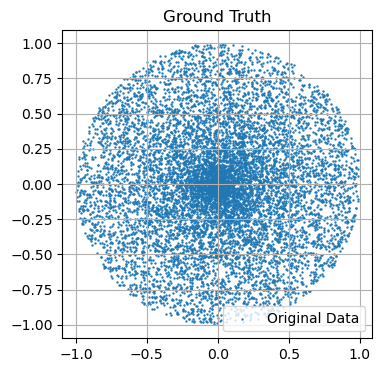

In [2]:
r = np.random.uniform(low = 0,high = 1, size = 10000)
theta = np.random.uniform(low = 0,high = 2*np.pi, size = 10000)
X = r*np.cos(theta)
Y = r*np.sin(theta)


Data_original = np.concatenate([X[:,None],Y[:,None]],axis = -1)

plt.figure(figsize=(4,4))
plt.scatter(Data_original[:,0],Data_original[:,1], s= 0.5, label = "Original Data")
plt.grid("True")
plt.legend()
plt.title("Ground Truth")

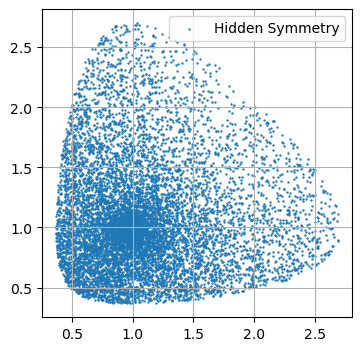

In [3]:
X_new = np.exp(X.copy()) # Coordinate Perturbation
Y_new = np.exp(Y.copy()) # Coordinate Perturbation
Data_perturbed = np.concatenate([X_new[:,None],Y_new[:,None]],axis = -1)

plt.figure(figsize=(4,4))
# plt.scatter(Data_original[:,0],Data_original[:,1], s= 0.5, label = "Original Data")
plt.scatter(Data_perturbed[:,0],Data_perturbed[:,1], s= 0.5, label = "Hidden Symmetry")
plt.grid("True")
plt.legend()

In [4]:
def psi(z):
    """
    The conserved charge in the new coordinate system
    """
    X_old_square = (torch.log(z[:,0])**2)
    Y_old_square = (torch.log(z[:,1])**2)
    
    return ((X_old_square+Y_old_square)**0.5)[:,None]

In [6]:
# Complete supervised train technique
tensor_original = torch.Tensor(Data_original)
tensor_perturbed = torch.Tensor(Data_perturbed)

dataset = torch.utils.data.TensorDataset(tensor_original, tensor_perturbed)

train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset,
                              batch_size=512,
                              shuffle=True,
                              drop_last = True,
                              num_workers=8,
                              pin_memory = False)

test_dataloader = DataLoader(test_dataset,
                              batch_size=4096,
                              shuffle=True,
                              drop_last = True,
                              num_workers=8,
                              pin_memory = False)

device = "cuda:2"

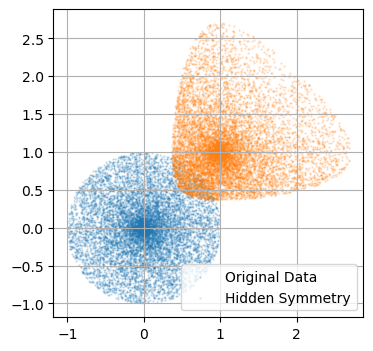

In [7]:
plt.figure(figsize=(4,4))
plt.scatter(tensor_original[:,0].detach().cpu(),tensor_original[:,1].detach().cpu(), s= 0.5, label = "Original Data", alpha = 0.2)
plt.scatter(tensor_perturbed[:,0].detach().cpu(),tensor_perturbed[:,1].detach().cpu(), s= 0.5, label = "Hidden Symmetry", alpha = 0.2)
plt.grid("True")
plt.legend()

  0%|          | 0/2000 [00:00<?, ?it/s]

EPOCH 0 complete
Symmetry Closure Loss  19.382610321044922
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  0.8940745711326599
Space Inversion Loss  1.3124471028645834
Total loss 21.589131995042166


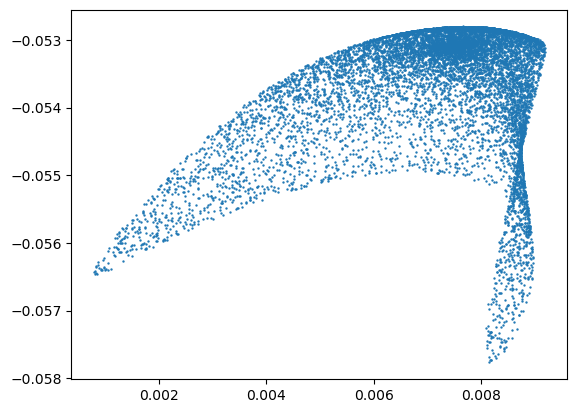

EPOCH 100 complete
Symmetry Closure Loss  0.04616888711849849
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  0.6764723817507426
Space Inversion Loss  0.11390406439701715
Total loss 0.8365453332662584


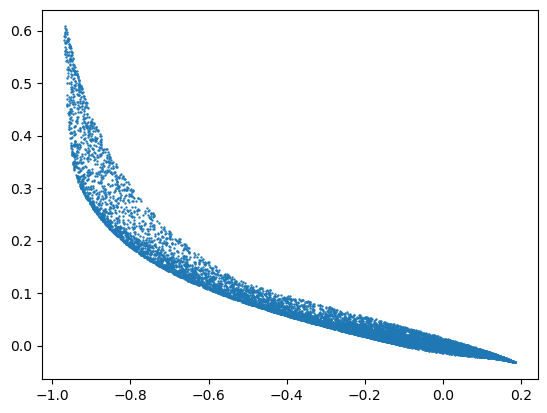

EPOCH 200 complete
Symmetry Closure Loss  0.0518661471704642
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  0.00020683606465657551
Space Inversion Loss  0.11341081311305364
Total loss 0.1654837963481744


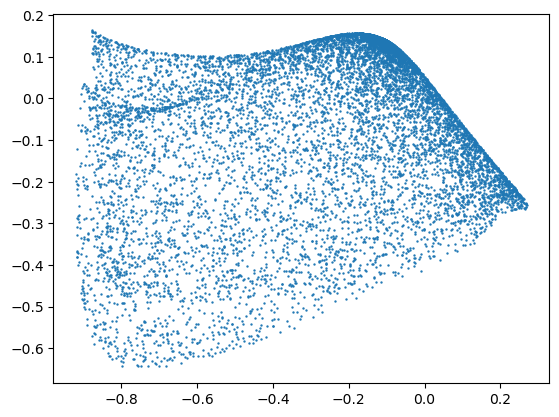

EPOCH 300 complete
Symmetry Closure Loss  0.011794307890037695
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  0.00023571401834487915
Space Inversion Loss  0.005030303945144018
Total loss 0.01706032585352659


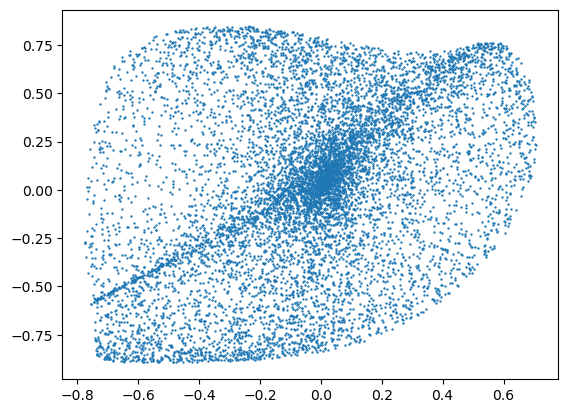

EPOCH 400 complete
Symmetry Closure Loss  0.0024535830753544966
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  0.00011249979337056478
Space Inversion Loss  0.0005809085831666986
Total loss 0.00314699145189176


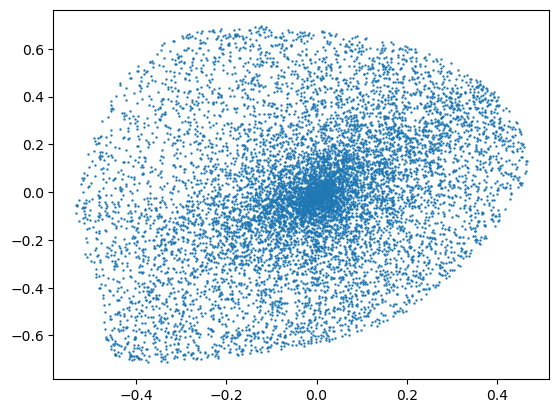

EPOCH 500 complete
Symmetry Closure Loss  0.0008852788829244673
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  9.079972902933756e-05
Space Inversion Loss  0.00021161546756047754
Total loss 0.0011876940795142825


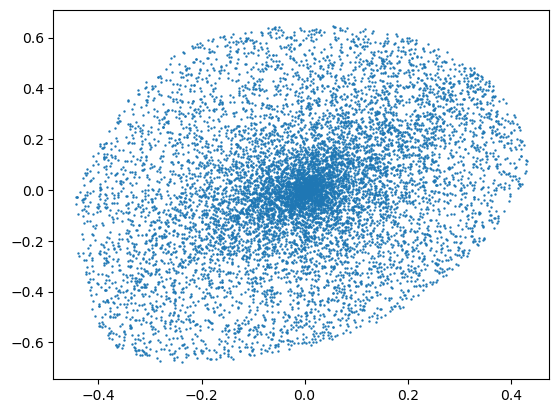

EPOCH 600 complete
Symmetry Closure Loss  0.0003470572216125826
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  0.00011498034000396728
Space Inversion Loss  0.00011574648669920862
Total loss 0.0005777840483157585


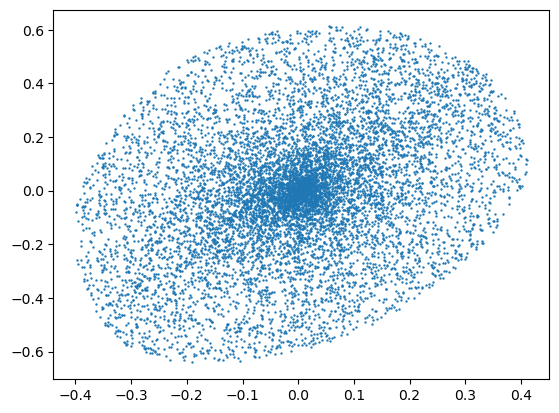

EPOCH 700 complete
Symmetry Closure Loss  0.00016980150539893656
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  0.0001085430383682251
Space Inversion Loss  8.881408915234109e-05
Total loss 0.00036715863291950275


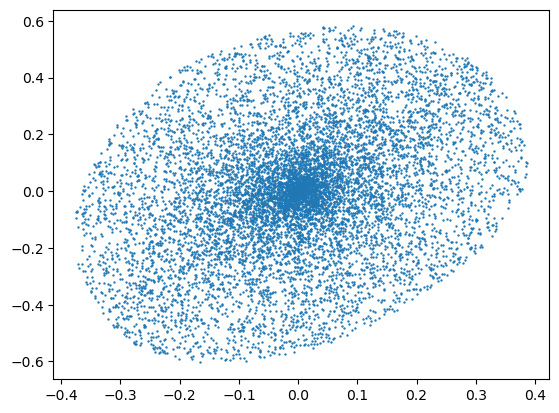

EPOCH 800 complete
Symmetry Closure Loss  9.643521043471992e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  0.00011540551980336508
Space Inversion Loss  5.8997393352910876e-05
Total loss 0.00027083812359099586


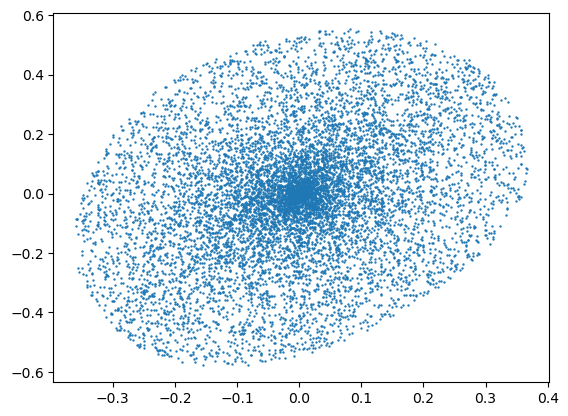

EPOCH 900 complete
Symmetry Closure Loss  7.761395027046092e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  0.0001234854261080424
Space Inversion Loss  6.0784160208034636e-05
Total loss 0.000261883536586538


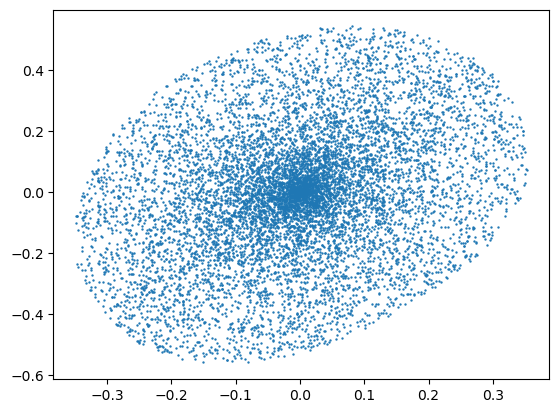

EPOCH 1000 complete
Symmetry Closure Loss  5.344037805722716e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  8.040318886439005e-05
Space Inversion Loss  3.252348687965423e-05
Total loss 0.00016636705380127144


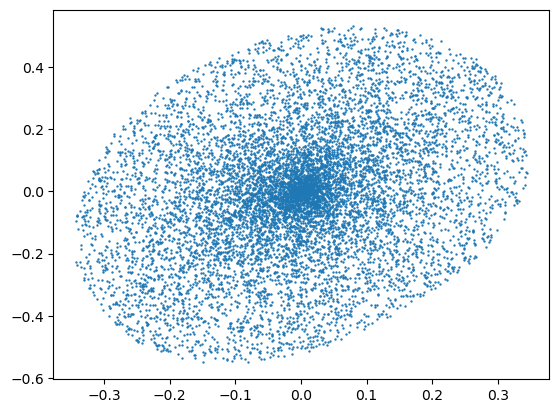

EPOCH 1100 complete
Symmetry Closure Loss  4.4221891827570894e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  9.850313266118368e-05
Space Inversion Loss  2.8301017907021256e-05
Total loss 0.0001710260423957758


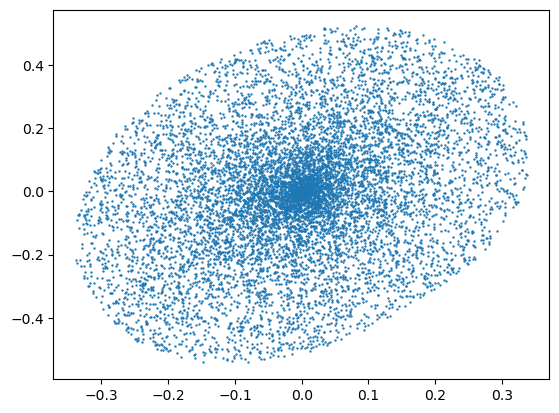

EPOCH 1200 complete
Symmetry Closure Loss  7.458762823565242e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  7.410993178685506e-05
Space Inversion Loss  9.041581931038915e-05
Total loss 0.00023911337933289664


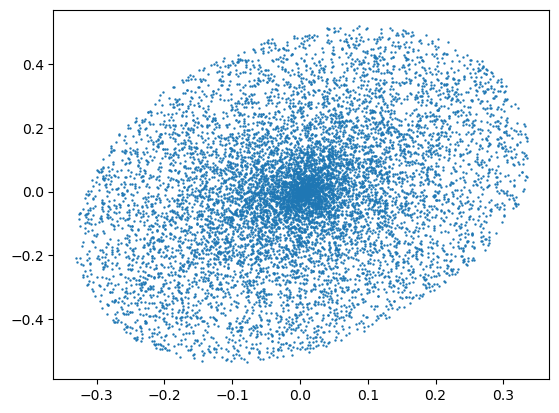

EPOCH 1300 complete
Symmetry Closure Loss  7.143865611093739e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  7.355809211730956e-05
Space Inversion Loss  9.023456029050673e-05
Total loss 0.0002352313085187537


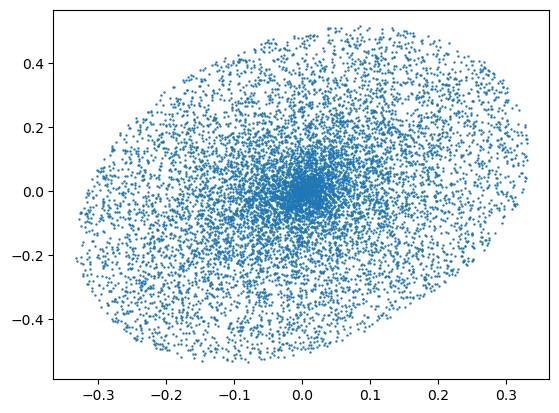

EPOCH 1400 complete
Symmetry Closure Loss  3.7182082693713406e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  7.309963305791219e-05
Space Inversion Loss  3.295363118619813e-05
Total loss 0.00014323534693782373


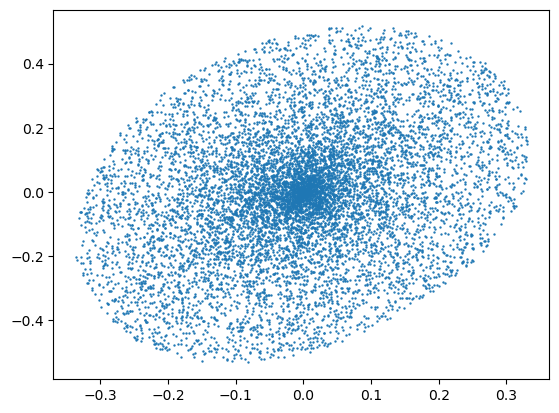

EPOCH 1500 complete
Symmetry Closure Loss  3.571519482648e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  0.0001077378789583842
Space Inversion Loss  3.132870903452082e-05
Total loss 0.00017478178281938504


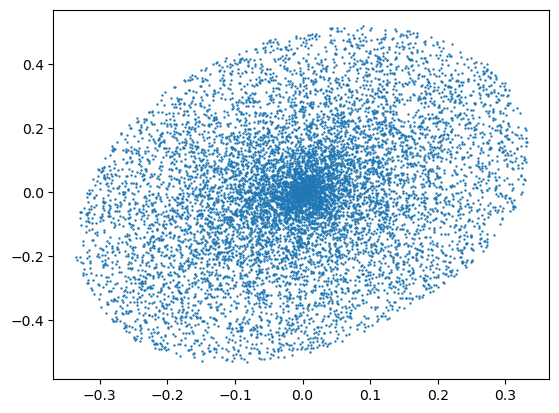

EPOCH 1600 complete
Symmetry Closure Loss  4.38275094590305e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  7.30892022450765e-05
Space Inversion Loss  4.7411402435197184e-05
Total loss 0.00016432811413930417


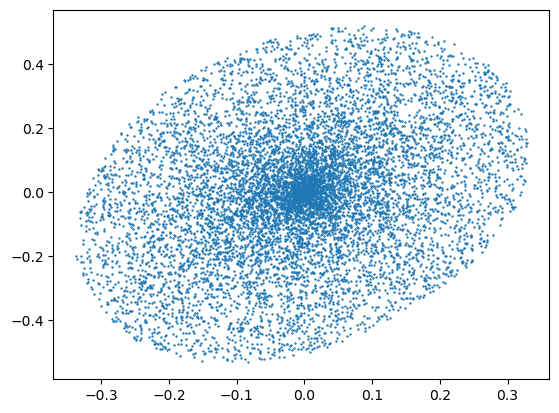

EPOCH 1700 complete
Symmetry Closure Loss  2.915658927425587e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  7.640719413757325e-05
Space Inversion Loss  2.4445958297292235e-05
Total loss 0.00013000974170912136


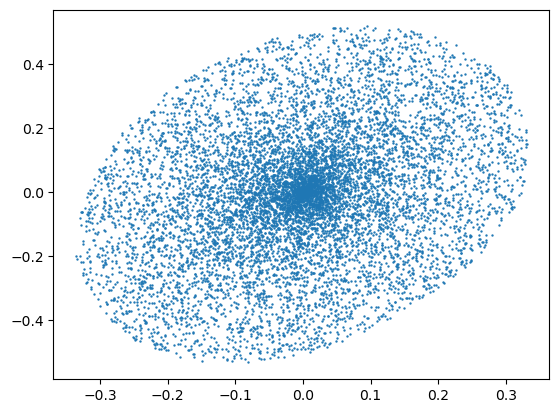

EPOCH 1800 complete
Symmetry Closure Loss  3.211103345771941e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  7.349451382954915e-05
Space Inversion Loss  3.0262999098340514e-05
Total loss 0.00013586854638560907


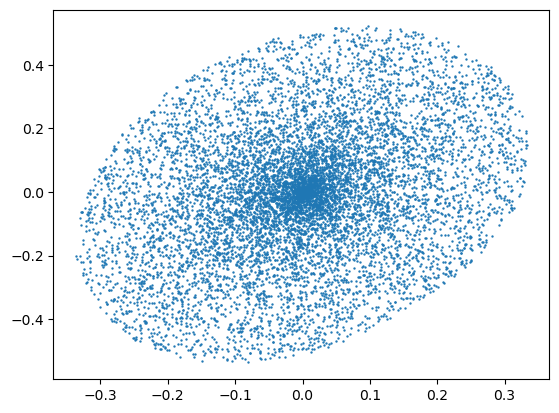

EPOCH 1900 complete
Symmetry Closure Loss  2.819860031498441e-05
Symmetry Orthogonality Loss  0
Symmetry Collapse Loss  9.30820902188619e-05
Space Inversion Loss  2.7005111769540234e-05
Total loss 0.00014828580230338655


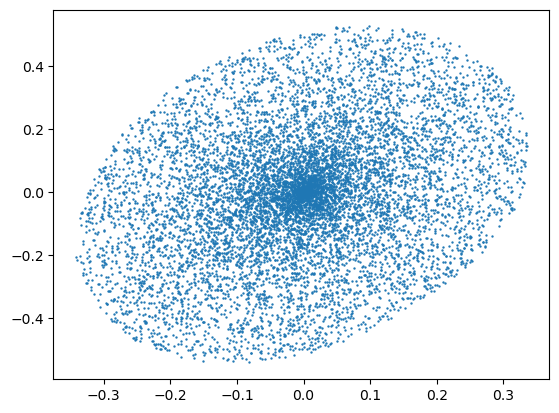

In [15]:
NUM_GEN = 1
model_symmetry = Operator(feature_size=2,
                          feature_multipier=4,
                          number_of_blocks=4,
                          num_generators=NUM_GEN,
                          normalise_enc=True,
                          normalise_dec=False,
                          LOSS_MODE="MSE"
                         ).to(device)
optimiser_symmetry = torch.optim.Adam(model_symmetry.parameters(), lr = 1e-3)
scheduler_symmetry = torch.optim.lr_scheduler.ReduceLROnPlateau(optimiser_symmetry, mode='min', factor=0.1, patience=10, verbose=True)

model_symmetry = train_for_hidden_symmetry(train_dataloader = train_dataloader,
                                           visualisation_set = tensor_perturbed,
                                           optimiser_symmetry = optimiser_symmetry,
                                           model_symmetry = model_symmetry,
                                           psi = psi,
                                           NUM_GEN = NUM_GEN,
                                           device = device,
                                           verbose= True,
                                           NEpochs = 2000,
                             )


### Looking at specific examples

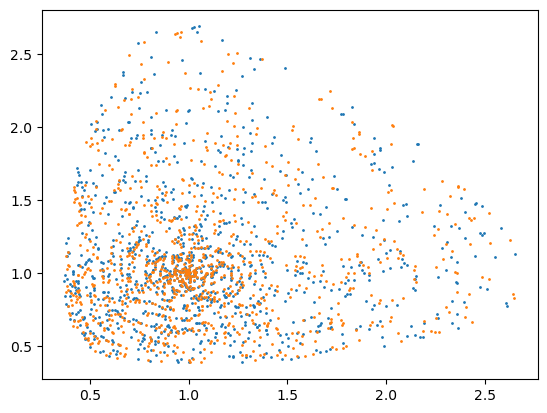

In [17]:
perturbed = tensor_perturbed[:1024,:].to(device)
theta = [(0.05*torch.ones(perturbed.shape[0],device = device)) for i in range(NUM_GEN)]  #Sampling

enc, trans, dec, dec_trans = model_symmetry(Z = perturbed,
                                            theta = theta)

original = perturbed.to("cpu").detach()
transformed = dec_trans.to("cpu").detach()

plt.scatter(original[:,0],original[:,1],s=1)
plt.scatter(transformed[:,0],transformed[:,1],s=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


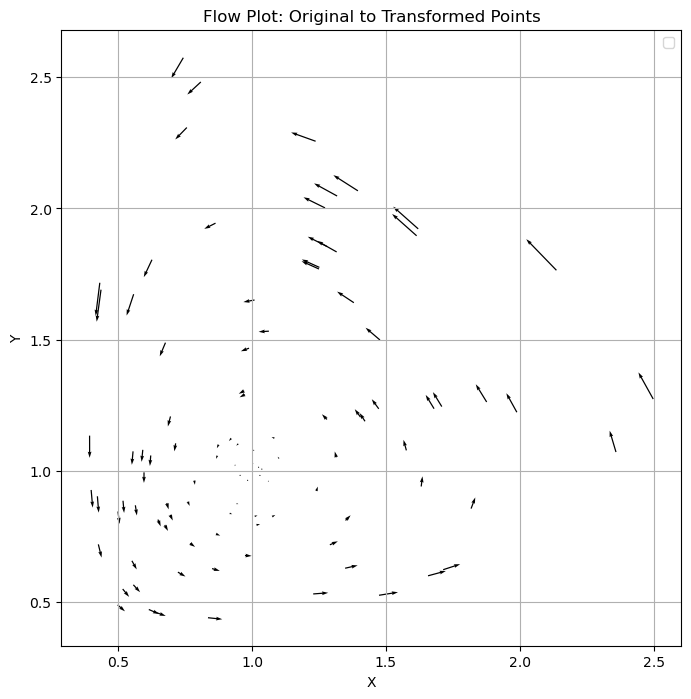

In [18]:
plt.figure(figsize=(8, 8))
magni = 1
dx = transformed[:100, 0] - original[:100, 0]
dy = transformed[:100, 1] - original[:100, 1]
plt.quiver(original[:100, 0], original[:100, 1], magni*dx, magni*dy, angles='xy', scale_units='xy', scale=1, width=0.002, alpha=1, color='black')

plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Flow Plot: Original to Transformed Points")
# plt.axis('equal')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


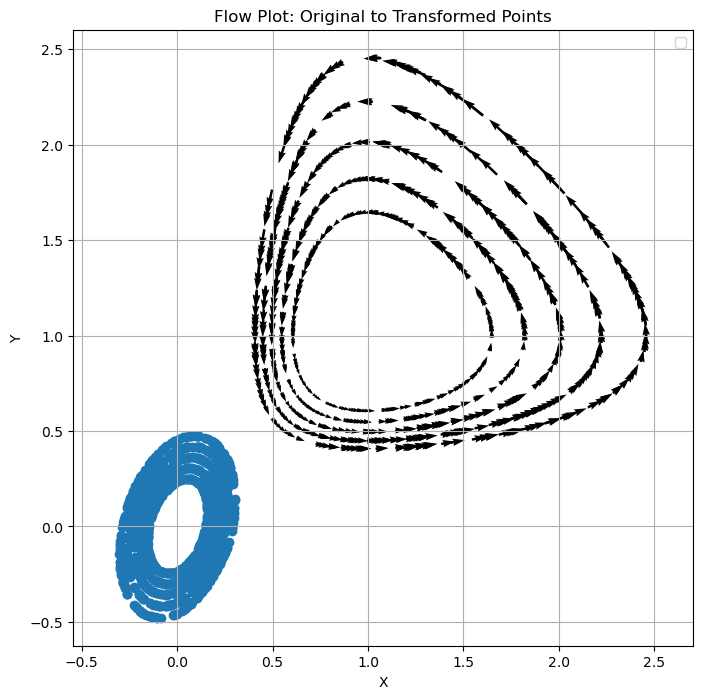

In [20]:
r = np.random.choice([0.5,0.6,0.7,0.8,0.9],1000)
theta = np.random.uniform(low = 0,high = 2*np.pi,size=1000)
X = r*np.cos(theta)
Y = r*np.sin(theta)

X_new = np.exp(X.copy()) # Coordinate Perturbation
Y_new = np.exp(Y.copy()) # Coordinate Perturbation
Data_vis = torch.Tensor(np.concatenate([X_new[:,None],Y_new[:,None]],axis = -1))


theta = [(0.05*torch.ones(Data_vis.shape[0],device = device)) for i in range(NUM_GEN)]  #Sampling

enc, trans, dec, dec_trans = model_symmetry(Z = Data_vis.to(device),
                                            theta = theta)

original = Data_vis.detach()
transformed = dec_trans.to("cpu").detach()


plt.figure(figsize=(8, 8))
magni = 1
dx = transformed[:, 0] - original[:, 0]
dy = transformed[:, 1] - original[:, 1]
plt.quiver(original[:, 0], original[:, 1], magni*dx, magni*dy, angles='xy', scale_units='xy', scale=1, width=0.004, alpha=1, color='black')
plt.scatter(enc[:,0].detach().cpu(),enc[:,1].detach().cpu())
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Flow Plot: Original to Transformed Points")
plt.axis('equal')
plt.grid(True)
plt.show()